0.6600000000000004

1.580999999999995

-0.14

array([[1.00000000e-20, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e-20],
       [9.99985000e-01, 9.99985000e-01, 9.99985000e-01, ...,
        9.99997000e-01, 9.99997000e-01, 9.99997000e-01],
       [9.99946700e-01, 9.99946700e-01, 9.99946700e-01, ...,
        9.99992000e-01, 9.99992000e-01, 9.99992000e-01],
       ...,
       [0.00000000e+00, 3.00191563e-03, 9.12172849e-03, ...,
        9.87231429e-01, 9.87230446e-01, 9.87230446e-01],
       [0.00000000e+00, 3.01512017e-03, 9.16045267e-03, ...,
        9.87139256e-01, 9.87138273e-01, 9.87138273e-01],
       [0.00000000e+00, 3.06793000e-03, 9.32089800e-03, ...,
        1.00442900e+00, 1.00442800e+00, 1.00000000e-20]])

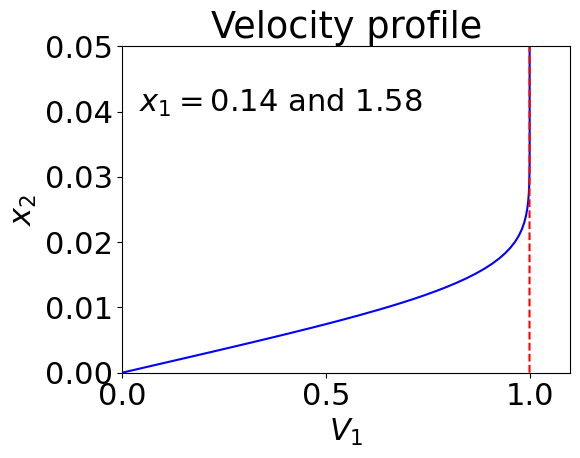

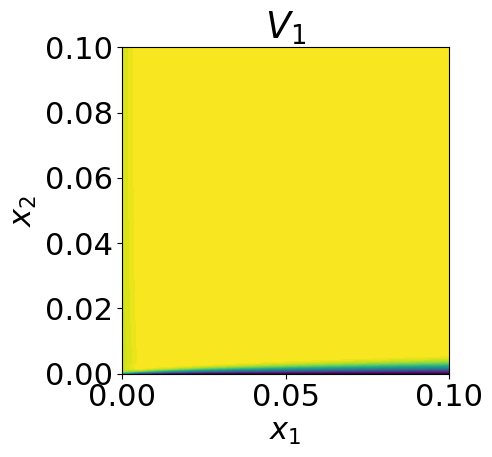

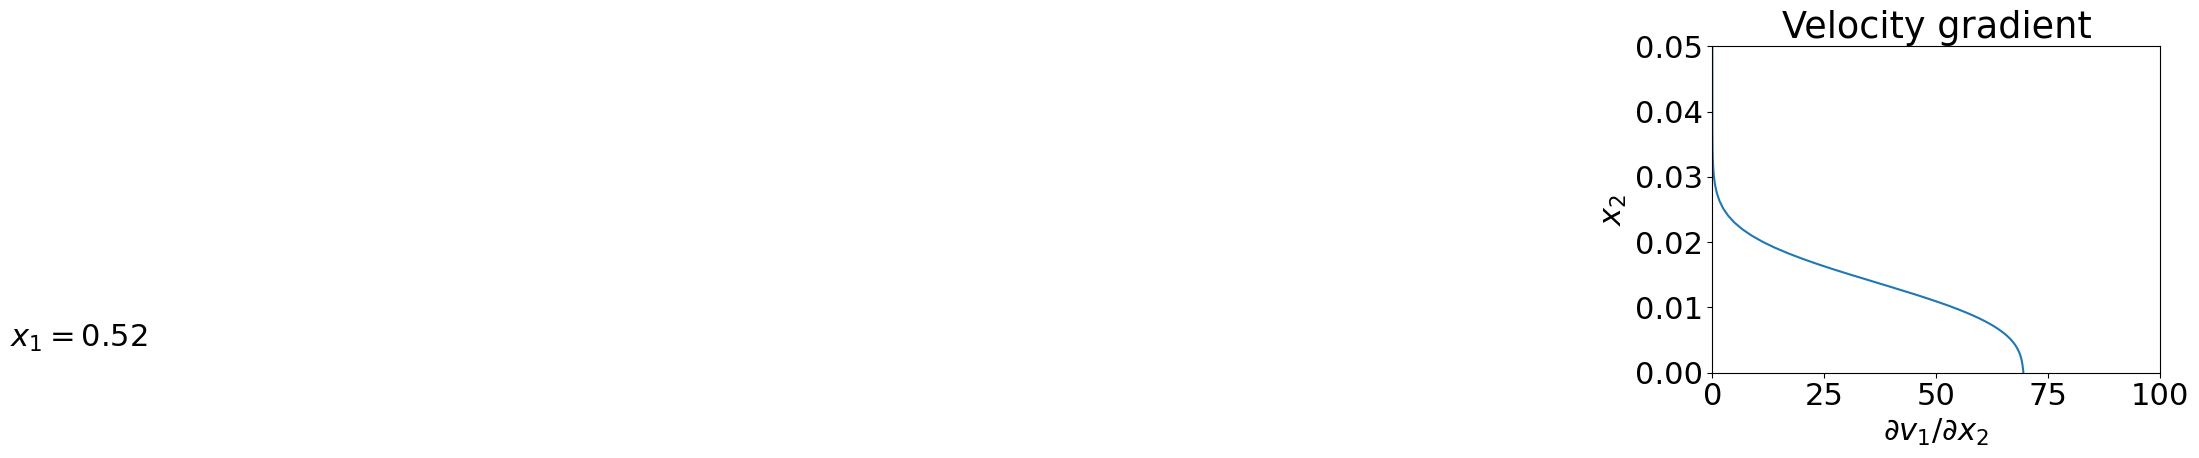

In [1]:
import numpy as np
from boundary_layer import *

a = (v1,(ni,nj))

# Coordinates of the points
display(xc[85])
display(xc[170])
display(xc[5])

# V_1inf, v1 freestream velocity
display(v1_2d)


## E1 Subtask 1

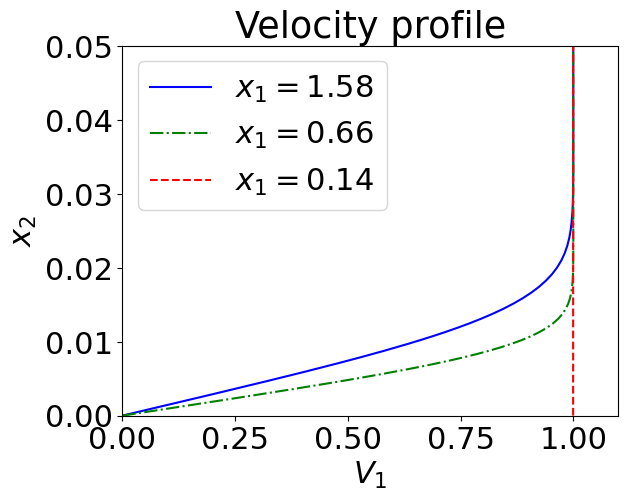

In [2]:
# Substask 1

i=170 # plot the velocity profile for i=170
plt.plot(v1_2d[i,:], x2_2d[i,:], 'b-', label='$x_1=1.58$')

i=85 # plot the velocity profile for i=85
plt.plot(v1_2d[i,:], x2_2d[i,:], 'g-.', label='$x_1=0.66$')

i=5 # plot the velocity profile for i=5
plt.plot(v1_2d[i,:], x2_2d[i,:], 'r--', label='$x_1=0.14$')

plt.title('Velocity profile')
plt.axis([0,1.1,0,0.05])
plt.xlabel('$V_1$') 
plt.ylabel('$x_2$') 

plt.legend(loc='best')
plt.savefig('velprof.png')


## E1 Subtask 2

V1_inf: 0.9896767627558745


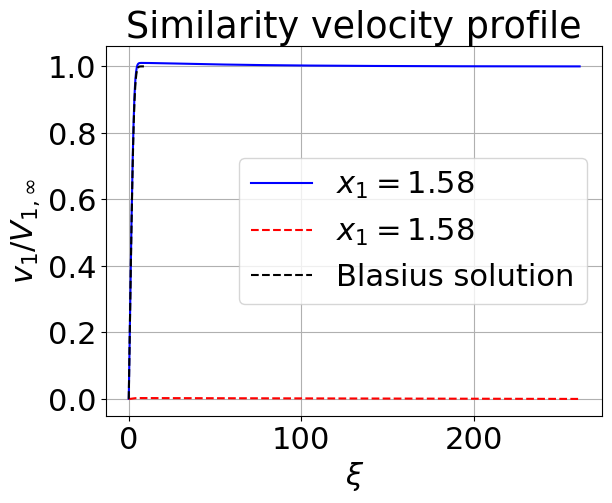

In [3]:
i = 170 # plot the dimensioneless velocity profile for i=170

# Freestream velocity at x1 location
V1_inf = v1_2d[i,-1] 

xi = yp * np.sqrt(V1_inf / (viscos * xc[i]))
v1_norm = v1_2d[i, :] / V1_inf
v2_norm = v2_2d[i, :] / V1_inf

print('V1_inf:', V1_inf)

#print(v2_norm)



# Plot
plt.figure()
plt.plot(xi, v1_norm, 'b-', label=fr'$x_1={xc[i]:.2f}$')
plt.plot(xi, v2_norm, 'r--', label=fr'$x_1={xc[i]:.2f}$')

# Adding Blasius solution for comparison
plt.plot(xi_blas, u_blas, 'k--', label='Blasius solution')

plt.xlabel(r'$\xi$')
plt.ylabel(r'$v_1 / V_{1,\infty}$')
plt.title('Similarity velocity profile')
plt.legend()
plt.grid(True)
plt.show()


## E2

0.02196174575714901
57
0.02463831745407603


/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_14071/973865662.py:11: RuntimeWarning: invalid value encountered in sqrt
  delta_gg_blasius = 5 * np.sqrt((viscos * xc)/V1_inf)


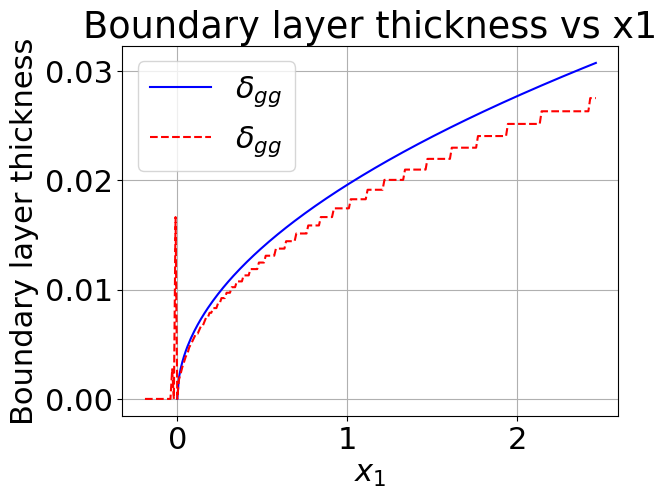

In [4]:


# Need to find x2 at the location where v1 = 0.99*V1_inf
index_gg_test = np.where(v1_2d[i,:] >= 0.99*V1_inf)[0][0]
delta_gg_test = x2_2d[i,index_gg_test]
print(delta_gg_test)
print(index_gg_test)

delta_gg = 5 * np.sqrt((viscos * xc[i])/V1_inf)
print(delta_gg)

# Need to now plot delta_gg and delta_gg_blasius as a function of x1
delta_gg_blasius = 5 * np.sqrt((viscos * xc)/V1_inf)
delta_gg_all = np.zeros_like(xc)

for i in range(len(xc)):
    V1_inf = v1_2d[i,-1]
    index_99 = np.where(v1_2d[i,:] >= 0.99*V1_inf)[0][0]
    delta_gg_all[i] = x2_2d[i,index_99]

plt.figure()
plt.plot(xc, delta_gg_blasius, 'b-', label=r'$\delta_{gg}$')
plt.plot(xc, delta_gg_all, 'r--', label=r'$\delta_{gg}$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'Boundary layer thickness')
plt.title('Boundary layer thickness vs x1')
plt.legend()
plt.grid(True)
plt.show()

#delta_star = 

/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_14071/3979287966.py:46: RuntimeWarning: invalid value encountered in sqrt
  delta_star_blasius[i] = 1.721 * np.sqrt((viscos * x1[i]) / Vinf)
/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_14071/3979287966.py:47: RuntimeWarning: invalid value encountered in sqrt
  theta_blasius[i]      = 0.664 * np.sqrt((viscos * x1[i]) / Vinf)


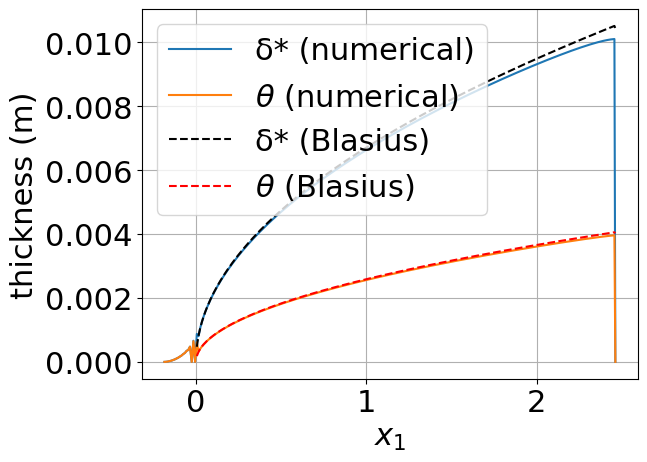

In [5]:
ni, nj = v1_2d.shape
# Creating empty arrays to store results
delta_star = np.zeros(ni)
theta = np.zeros(ni)

delta_star_blasius = np.zeros(ni)
theta_blasius = np.zeros(ni)

x1 = x1_2d[:,0]

for i in range(ni):
    # local x2 array 
    x2 = x2_2d[i, :]

    # local velocity profile
    u = v1_2d[i, :].copy()

    # local freestream velocity (could also use constant V1_inf = 1.0)
    Vinf = np.max(v1_2d[i,:])
    if Vinf == 0:
        # avoid division by zero, skipping or setting to NaN
        delta_star[i] = np.nan
        theta[i] = np.nan
        continue


    # normalized velocity
    uhat = v1_2d[i,:] / Vinf

    # finding index of maximum u
    jmax = np.argmax(u)  # returns first index of maximum
    

    # integration domain up to jmax (include jmax)
    x2_int = x2[:jmax+1]
    uhat_int = uhat[:jmax+1]

    # integrands
    integrand_delta = 1.0 - uhat_int
    integrand_theta = uhat_int * (1.0 - uhat_int)

    # trapezoidal integration
    delta_star[i] = np.trapz(integrand_delta, x2_int)
    theta[i]      = np.trapz(integrand_theta, x2_int)

    delta_star_blasius[i] = 1.721 * np.sqrt((viscos * x1[i]) / Vinf)
    theta_blasius[i]      = 0.664 * np.sqrt((viscos * x1[i]) / Vinf)


    #delta_star_blasius[i] = np.trapz(1.7208 * np.sqrt((viscos * xc[i]) / Vinf, x2_int))
    #theta_blasius[i] = np.trapz(0.664 * np.sqrt((viscos * xc[]) / Vinf, x2_int))

# Plotting
plt.figure()
plt.plot(x1[1:], delta_star[1:], label="δ* (numerical)")
plt.plot(x1[1:], theta[1:], label=r'$\theta$ (numerical)')
plt.plot(x1, delta_star_blasius, 'k--', label="δ* (Blasius)")
plt.plot(x1, theta_blasius, 'r--', label=r'$\theta$ (Blasius)')
plt.xlabel('$x_1$')
plt.ylabel('thickness (m)')
plt.legend()
plt.grid(True)
plt.show()

#display(delta_star, theta)

## E3

Text(0.5, 0, '$\\partial V_1 / \\partial x_2$')

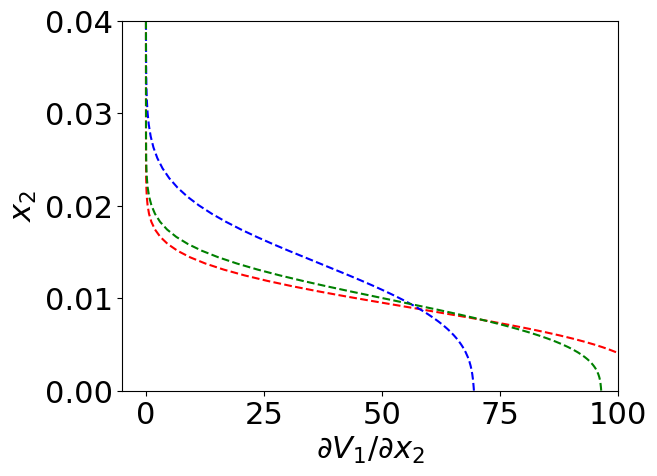

In [6]:
i = 85
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.figure()
plt.plot(gradient, x2_2d[i,:], 'r--')
i = 170
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.plot(gradient, x2_2d[i,:], 'b--')
i = 100
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.axis([-5,100,0,0.04])
plt.plot(gradient, x2_2d[i,:], 'g--')
plt.ylabel('$x_2$')
plt.xlabel('$\\partial V_1 / \\partial x_2$')

## E4

/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_14071/324503190.py:16: RuntimeWarning: invalid value encountered in sqrt
  Cf_blas = 0.664 / np.sqrt((Vinf * x1) / viscos)
/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_14071/324503190.py:19: RuntimeWarning: invalid value encountered in sqrt
  valid = np.isfinite(Cf) & (np.sqrt((Vinf * x1) / viscos) > 0) # Avoiding invalid values


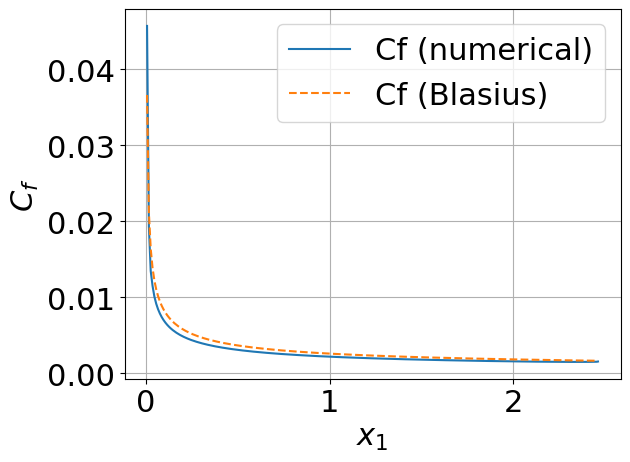

In [7]:

rho = 1.204             # kg/m^3 at 20C

dvdx = np.gradient(v2_2d, xp, axis=0)  # ∂v2/∂x1

tau12 = viscos * (dudy + dvdx)   # shape (ni, nj) as denoted in boundary_layer.py

# extract wall shear stress at the wall index j=0
tau_w = tau12[:,0]          

Vinf = 1 # freestream velocity (assumed constant according to problem statement)

# local skin friction coefficient
Cf = tau_w / (0.5 * rho * Vinf**2)

# Blasius solution for Cf
Cf_blas = 0.664 / np.sqrt((Vinf * x1) / viscos)

# Plotting results
valid = np.isfinite(Cf) & (np.sqrt((Vinf * x1) / viscos) > 0) # Avoiding invalid values
plt.figure()
plt.plot(xp[valid], Cf[valid], label='Cf (numerical)')
plt.plot(xp[valid], Cf_blas[valid], '--', label='Cf (Blasius)')
plt.xlabel('$x_1$')
plt.ylabel('$C_f$')
plt.legend()
plt.grid(True)
plt.show()

## E5

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)

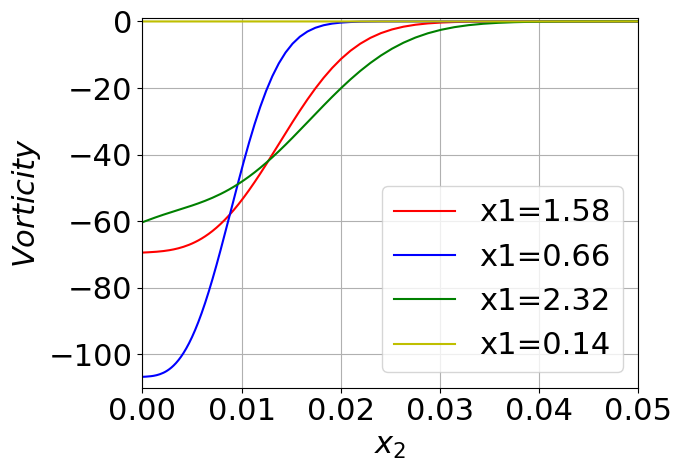

In [8]:
import numpy as np
import matplotlib.pyplot as plt

i = 170

dvdxe5 = np.gradient(v2_2d, xp, axis=0) 
dudye5 = np.gradient(v1_2d, yp, axis=1)
vorticity = (dvdx - dudy)


plt.figure()
plt.plot(yp, vorticity[i,:], 'r-', label='x1=1.58')


i = 85

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)


plt.plot(yp, vorticity[i,:], 'b-', label='x1=0.66')

i = 250

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)

plt.plot(yp, vorticity[i,:], 'g-', label='x1=2.32')

i = 5

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)

plt.plot(yp, vorticity[i,:], 'y-', label='x1=0.14')
plt.axis([0,0.05,-110,1])
plt.xlabel('$x_2$')
plt.ylabel('$Vorticity$')
plt.legend()
plt.grid(True)
plt.show()

## E6

[[ 1.00000000e+04  6.71268904e+03  4.04296700e-05 ...  7.53144300e-05
  -5.41234292e+01 -8.11852031e+01]
 [-6.66666667e-19  1.75192534e-05  3.31335300e-05 ...  6.46841983e-05
   3.33749600e-05 -6.66666667e-19]
 [ 0.00000000e+00  1.20348373e-05  2.28788325e-05 ...  4.38959175e-05
   2.06224775e-05  0.00000000e+00]
 ...
 [ 3.00191563e+01  3.00028988e+01  2.99444839e+01 ... -8.50922920e-05
  -2.22852429e-05  0.00000000e+00]
 [ 3.01512017e+01  3.01326196e+01  3.00658820e+01 ... -9.07323151e-05
  -1.71918035e-05  6.06060606e-19]
 [ 3.06793000e+01  3.06603922e+01  3.05924823e+01 ... -8.11852031e-05
  -5.43631410e+01 -8.15446911e+01]]
[[ 1.00000000e+04  6.71268900e+03 -4.04296700e-05 ... -7.53144300e-05
  -5.41235082e+01 -8.11852031e+01]
 [ 6.66666667e-19 -1.75192566e-05 -3.31335300e-05 ... -6.46841983e-05
  -3.33749600e-05  6.66666667e-19]
 [ 0.00000000e+00 -1.20348377e-05 -2.28788325e-05 ... -4.38959175e-05
  -2.06224775e-05  0.00000000e+00]
 ...
 [ 3.00191563e+01  3.00028986e+01  2.9944477

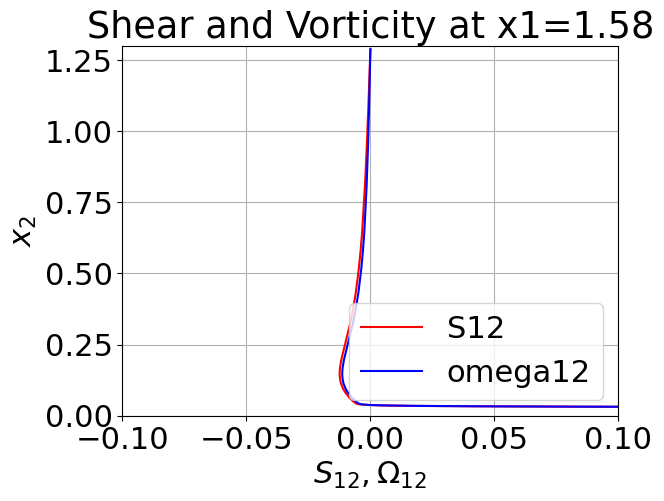

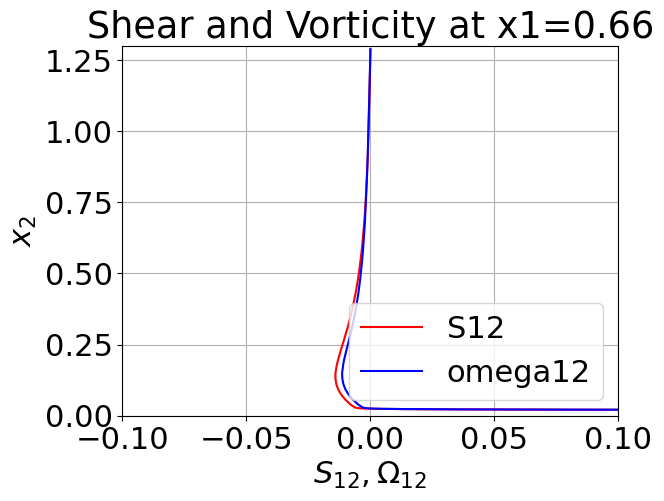

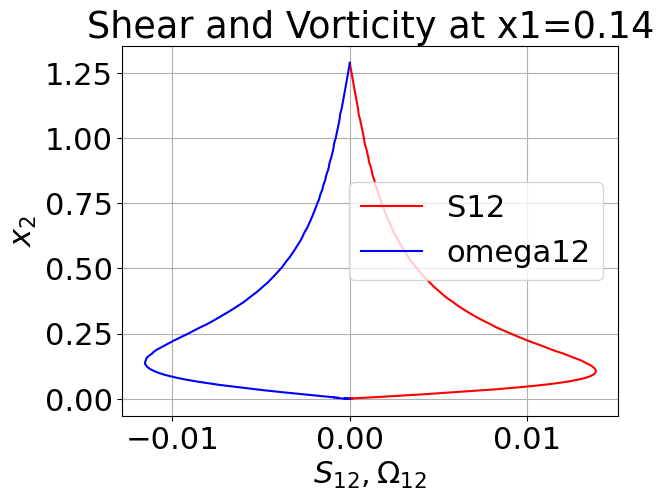

In [9]:
S12 = 0.5 * (dudy + dvdx)
omega12 = 0.5 * (dudy - dvdx)

print(S12)
print(omega12)

i = 170

plt.figure()
plt.plot(S12[i,:], yp, 'r-', label='S12')
plt.plot(omega12[i,:], yp, 'b-', label='omega12')
plt.title('Shear and Vorticity at x1=1.58')
plt.xlabel('$S_{12}, \\Omega_{12}$')
plt.ylabel('$x_2$')
plt.legend()
plt.axis([-0.1,0.1,0,1.3])
plt.grid(True)
plt.show()

i = 85

plt.figure()
plt.plot(S12[i,:], yp, 'r-', label='S12')
plt.plot(omega12[i,:], yp, 'b-', label='omega12')
plt.title('Shear and Vorticity at x1=0.66')
plt.xlabel('$S_{12}, \\Omega_{12}$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.axis([-0.1,0.1,0,1.3])
plt.show()

i = 5

plt.figure()
plt.plot(S12[i,:], yp, 'r-', label='S12')
plt.plot(omega12[i,:], yp, 'b-', label='omega12')
plt.title('Shear and Vorticity at x1=0.14')
plt.xlabel('$S_{12}, \\Omega_{12}$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)
plt.show()

# X2 (y) value is incorrect, need to be calculated based on given height and amount of elements.

# Change axels, meaning x on y axis, and then plot for x1 coordinates, meaning x1=i for example.





## E7 Subtask 1

Look at equation (2.10) for tau formulation

(252, 200)
(252, 200)


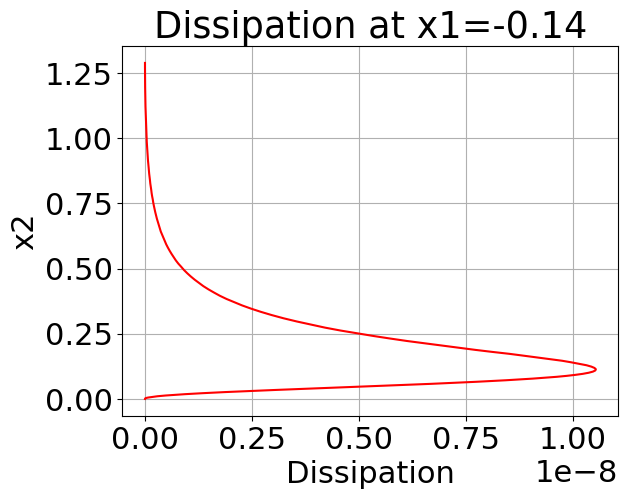

i = 18 Max dissipation at i = 0.0005705231228758274
0.0005705231228758274


In [ ]:
tau = viscos * (dudy + dvdx)
dissipation = tau * dvdx
print(np.shape(tau))
print(np.shape(dissipation))
# need one plot for each x1 location

i = 5
plt.figure()
plt.plot(dissipation[i, :], yp, 'r-')
plt.title(f'Dissipation at x1={xc[i]:.2f}')
plt.xlabel('Dissipation')
plt.ylabel('x2')
plt.grid(True)
plt.show()

max_dissipation_guess = -np.inf
max_i = 0
for i in range(ni):
    current_max = np.max(dissipation[i, :])
    if current_max > max_dissipation_guess:
        max_dissipation_guess = current_max
        max_i = i

print('i =', max_i, 'Max dissipation at i =', max_dissipation_guess)

#for i in range(ni-1):
    #plt.figure()
    #plt.plot(dissipation[i, :], yp[i, :], 'r-')
    #plt.title(f'Dissipation at x1={xc[i]:.2f}')
    #plt.xlabel('Dissipation')
    #plt.ylabel('x2')
    #plt.grid(True)
    #plt.show()

print(np.max(dissipation))

## E7 Subtask 2

Total dissipation Q = -5.014887922901744e-07
Temperature decrease dT = -1.2079044294111069e-12 K over dt = 0.01 s


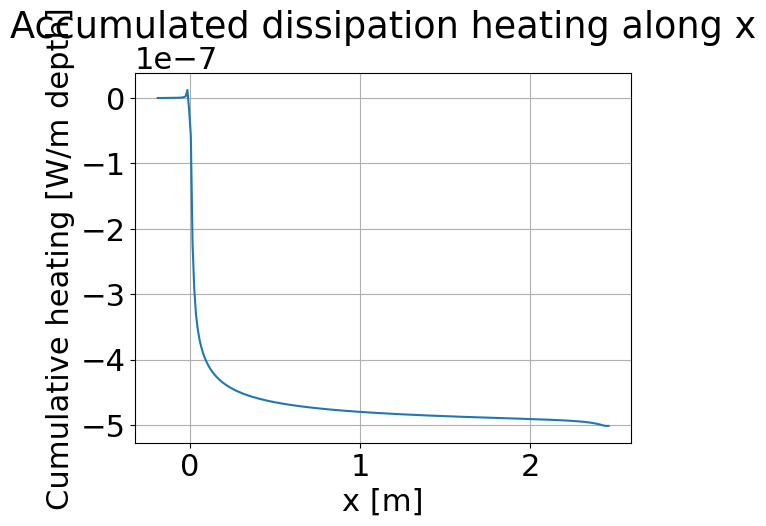

In [11]:
tau = viscos * (dudy + dvdx)
dissipation = tau * dvdx

# assume xp, yp are 1D grids (nonuniform spacing possible)
dx = np.gradient(xp)   # length ni
dy = np.gradient(yp)   # length nj

# build 2D cell area grid
dx2d, dy2d = np.meshgrid(dx, dy, indexing="ij")
dA = dx2d * dy2d

# integrate dissipation over the domain
Q_total = np.sum(dissipation * dA)

Q_cumulative = np.cumsum(np.sum(dissipation * dA, axis=1))   # shape (ni,)

print("Total dissipation Q =", Q_total)

rho = 1.204    # kg/m^3
cp = 1005      # J/kg-K (air at ~300K)

V = np.sum(dA)     # domain area (per unit depth)
dt = 0.01          # choose timestep in seconds

dT = (Q_total * dt) / (rho * cp * V)

print("Temperature decrease dT =", dT, "K over dt =", dt, "s")

plt.plot(xp, Q_cumulative)
plt.xlabel("x [m]")
plt.ylabel("Cumulative heating [W/m depth]")
plt.title("Accumulated dissipation heating along x")
plt.grid(True)
plt.show()

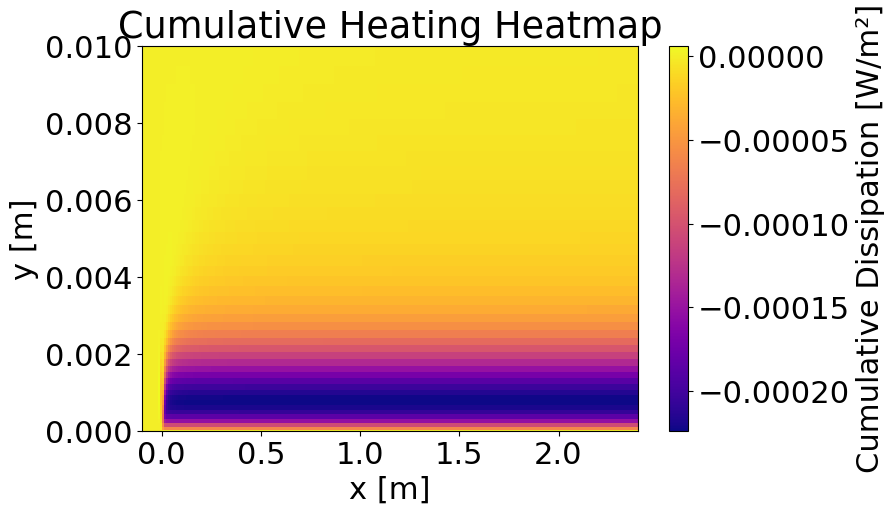

In [19]:
# physical properties
rho = 1.204   # air density [kg/m^3]
cp  = 1005    # specific heat at 20C [J/kg/K]

# grid spacing
dx = np.gradient(xp)      # length ni
dy = np.gradient(yp)      # length nj

# make 2D arrays of dx, dy so shape matches dissipation
dx2d, dy2d = np.meshgrid(dx, dy, indexing="ij")
dA = dx2d * dy2d          # cell areas (ni, nj)

# integrate dissipation over cross-section for each x
Q_x = np.sum(dissipation * dA, axis=1)   # shape (ni,), power per streamwise slice

# cumulative heating up to each x
Q_cumulative = np.cumsum(Q_x)            # shape (ni,), total energy input (W per unit span)

# cumulative sum along x-direction (axis=0)
dissipation_cum = np.cumsum(dissipation * dx[:,None], axis=0)

plt.figure(figsize=(8,5))
plt.pcolormesh(xp, yp, dissipation_cum.T, shading="auto", cmap="plasma")
plt.colorbar(label="Cumulative Dissipation [W/m²]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Cumulative Heating Heatmap")
plt.axis([-0.1,2.4,0,0.01])
plt.show()

